In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
virus_confirmed =pd.read_csv('C:/Users/karan/OneDrive/Documents/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [3]:
virus_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,989,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,410,410,411,413,414,414,418,418,422,426
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,102,119,120


In [4]:
virus_by_country = virus_confirmed.groupby('Country/Region').sum()

In [5]:
virus_by_country.drop(['Lat','Long'], axis=1,inplace=True)

In [6]:
virus_by_country = virus_by_country.transpose()

In [7]:
virus_by_country.index = pd.to_datetime(virus_by_country.index)

In [8]:
virus_by_country.loc['03/07/2020'].nlargest(5)

Country/Region
Mainland China    80652
South Korea        7041
Italy              5883
Iran               5823
France              949
Name: 2020-03-07 00:00:00, dtype: int64

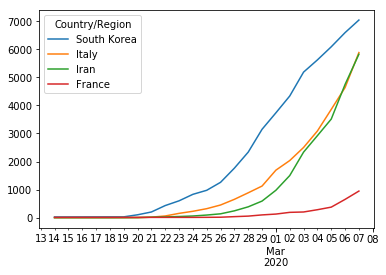

In [10]:
virus_by_country.loc['14/02/2020':,['South Korea', 'Italy', 'Iran', 'France']].plot()